In [15]:
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.io import imread
from tnia.deeplearning.dl_helper import ray4_to_ellipsoid2d_labels
from csbdeep.utils import normalize
import numpy as np
# import stardist2d
from stardist.models import StarDist2D
from tnia.plotting.plt_helper import imshow_multi2d
from tnia.plotting.plt_helper import random_label_cmap

In [19]:
tnia_images_path = Path(r'D:\images')
parent_path = Path(tnia_images_path / r'tnia-python-images/imagesc/2024_02_06_em_pores')
model_path = parent_path / 'model'
results_path = parent_path / 'results'

In [11]:
model = StarDist2D(config=None, name="stardistmodel1", basedir=model_path)

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.287112, nms_thresh=0.3.


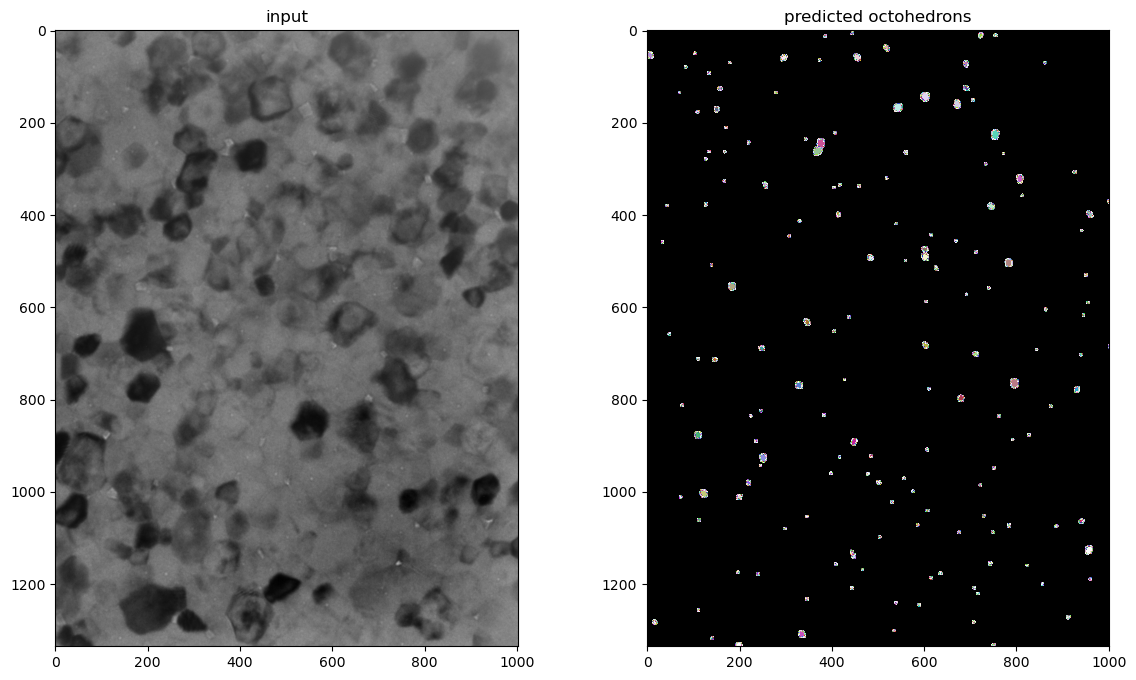

In [21]:
test_name='test_2'
testim = imread(parent_path  / 'labels' / 'inputs' / (test_name+'.tif'))
testim = normalize(testim,3,97, axis=(0,1))
labels, details = model.predict_instances(testim, prob_thresh=0.05, nms_thresh=0.1)
fig = imshow_multi2d([testim,labels],['input','predicted octohedrons'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])

In [18]:
import napari
viewer = napari.Viewer()
viewer.add_image(testim)
viewer.add_labels(labels)


napari.manifest -> 'napari-hello' could not be imported: Cannot find module 'napari_plugins' declared in entrypoint: 'napari_plugins:napari.yaml'


<Labels layer 'labels' at 0x19a4b0f8af0>

In [22]:
from skimage.io import imsave
imsave(results_path / (test_name+'_stardist_prediction.tif'), labels.astype('uint16'))

1694789875.py (2): D:\images\tnia-python-images\imagesc\2024_02_06_em_pores\results\test_2_stardist_prediction.tif is a low contrast image
